<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB02/LAB02_p2_julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 2**
**Grupo**: B01

**Integrantes**: Claudia Esnarrizaga, Ana Robledano, Celia Díaz, Julia Callaba

## **PRÁCTICA 1 (Reglas de Asociación)**

###**Enunciado**

Usa la librería `mlxtend` que nos permita solucionar todos los problemas relacionados con las reglas de
asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta
información que este genera.

Usaremos la librería con el Dataset **Market_Basket_Optimisation.csv** que se ha proporcionado.

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

¿Qué tipo de reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase `association_rules` y un par de configuraciones cambiando la variable `metric` y `min_threshold`.

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado?

## **PRÁCTICA 2 (Patronces Secuenciales)**




In [22]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB02/Online Retail.xlsx"

nombre = 'Online Retail.xlsx'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


In [23]:
df = pd.read_excel('Online Retail.xlsx')

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


- InvoiceNo: Este es el número de factura que identifica de forma única cada transacción de compra. Cada vez que se realiza una compra, se genera una nueva factura con un número de factura único.

- StockCode: Este es un código único que identifica un producto específico en el inventario de la tienda en línea. Cada producto en el inventario tiene su propio código de stock.

- Description: Esta columna proporciona una descripción del producto asociado con el código de stock. Proporciona información adicional sobre el producto, como su nombre o características.

- Quantity: Esta columna indica la cantidad de unidades del producto que se compraron en la transacción correspondiente. Por ejemplo, si se compra un producto en múltiples cantidades, el valor en esta columna será mayor que 1.

- InvoiceDate: Este es el timestamp que indica la fecha y hora en que se realizó la transacción de compra. Proporciona información sobre cuándo se llevó a cabo la compra.

- UnitPrice: Este es el precio unitario del producto en la moneda local en la que se realizó la transacción. Indica cuánto cuesta una sola unidad del producto.

- CustomerID: Este es el identificador único del cliente que realizó la compra. Cada cliente tiene un CustomerID único asociado con su cuenta en la tienda en línea.

- Country: Esta columna indica el país donde se realizó la transacción. Proporciona información sobre la ubicación geográfica del cliente que realizó la compra.

In [3]:
pip install gsppy

In [9]:
from gsppy.gsp import GSP

# Crear una lista de transacciones para cada cliente
transacciones = df.groupby('CustomerID')['StockCode'].apply(list).tolist()

transacciones

[[23166, 23166],
 [22212,
  '84997C',
  '85167B',
  21171,
  22195,
  84969,
  '84997B',
  '84558A',
  22494,
  22497,
  '85232D',
  21064,
  21731,
  20780,
  20782,
  22729,
  '84997D',
  22728,
  22774,
  22726,
  22727,
  85116,
  22375,
  22492,
  22771,
  22772,
  22773,
  22775,
  22805,
  22725,
  71477,
  22423,
  '47559B',
  21154,
  21041,
  21035,
  84969,
  22417,
  21832,
  22422,
  22497,
  21731,
  '84558A',
  22134,
  21976,
  22727,
  84992,
  '84625A',
  '84625C',
  85116,
  20719,
  22375,
  22376,
  84991,
  22725,
  22726,
  20966,
  22728,
  22729,
  22196,
  21975,
  22497,
  22821,
  16008,
  '84559B',
  '84559A',
  22492,
  21731,
  22699,
  22423,
  21041,
  22196,
  22376,
  22774,
  22374,
  22371,
  22375,
  20665,
  22195,
  21791,
  22550,
  23177,
  22432,
  23076,
  85178,
  22725,
  22727,
  '51014C',
  '84558A',
  22196,
  23146,
  17021,
  22375,
  22371,
  23175,
  23174,
  23173,
  23170,
  23172,
  23171,
  23162,
  23084,
  23316,
  21791,
  229

In [5]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [6]:
# Definir el StockCode que deseas buscar
stockcode_a_buscar = '84406B'  # Puedes cambiar esto al StockCode que necesites

# Buscar el StockCode en el DataFrame
resultado = df[df['StockCode'] == stockcode_a_buscar]

# Mostrar el nombre del cliente asociado al StockCode encontrado
if not resultado.empty:
    nombre_cliente = resultado.iloc[0]['CustomerID']
    print(f"El nombre del cliente asociado al StockCode {stockcode_a_buscar} es: {nombre_cliente}")
else:
    print(f"No se encontró ningún cliente asociado al StockCode {stockcode_a_buscar}")

El nombre del cliente asociado al StockCode 84406B es: 17850


In [7]:
# Convertir la columna InvoiceDate a tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ordenar las transacciones por InvoiceDate
df = df.sort_values(by='InvoiceDate')

# Agrupar las transacciones por cliente y crear una lista de secuencias de transacciones para cada cliente
secuencias_clientes = df.groupby('CustomerID')['StockCode'].apply(list).tolist()

# Mostrar las primeras secuencias de transacciones para algunos clientes como ejemplo
for i in range(10):  # Mostrar las primeras 5 secuencias como ejemplo
    print(f"Cliente {i+1}: {secuencias_clientes[i]}")

Cliente 1: [23166, 23166]
Cliente 2: [22212, '84997C', '85167B', 21171, 22195, 84969, '84997B', '84558A', 22494, 22497, '85232D', 21064, 21731, 20780, 20782, 22729, '84997D', 22728, 22774, 22726, 22727, 85116, 22375, 22492, 22771, 22772, 22773, 22775, 22805, 22725, 71477, 22423, '47559B', 21154, 21041, 21035, 84969, 22417, 21832, 22422, 22497, 21731, '84558A', 22134, 21976, 22727, 84992, '84625A', '84625C', 85116, 20719, 22375, 22376, 84991, 22725, 22726, 20966, 22728, 22729, 22196, 21975, 22497, 22821, 16008, '84559B', '84559A', 22492, 21731, 22699, 22423, 21041, 22196, 22376, 22774, 22374, 22371, 22375, 20665, 22195, 21791, 22550, 23177, 22432, 23076, 85178, 22725, 22727, '51014C', '84558A', 22196, 23146, 17021, 22375, 22371, 23175, 23174, 23173, 23170, 23172, 23171, 23162, 23084, 23316, 21791, 22992, 23147, 23175, 22423, 21975, 84991, 84992, '47559B', '84558A', 23146, 20719, 21578, 22372, 22376, 22374, 22375, 23297, 23308, 22727, 22371, 22725, 22699, 23420, 23422, 22492, 23146, 2262


Los valores negativos probablemente significan que hubo devoluciones. Este es un factor importante para el comercio electrónico, pero para este estudio vamos a mantener solo las transacciones sin devolución (nuestro objetivo es presentar y comparar diferentes métodos de agrupación).

In [11]:
df = df.loc[df["Quantity"] >0 ]
df = df.loc[df["UnitPrice"] >0 ]

Creamos una nueva columna que se llame Cantidad total

In [12]:
# creating a new column of Total amount
df["Total"]=df["Quantity"]*df["UnitPrice"]

Eliminamos las columnas 'Quantity' y 'UnitPrice' y revisar los datos en busca de valores faltantes

In [13]:
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
Total          0
dtype: int64

Creamos 2 nuevas características:

- Frecuencia: número total de transacciones

- Cantidad: cantidad total de transacciones

In [14]:
#Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Eliminamos la columna 'CustomerID'

In [16]:
df1.drop(['CustomerID'],axis = 1, inplace =True)

Detección de outliers

In [18]:
df1.describe(include='all')

,Amount,Frequency
count,4.338000e+03,4338.000000
mean,2.458895e+03,122.200092
std,2.810288e+04,2019.397663
min,3.750000e+00,1.000000
25%,3.074150e+02,17.000000
50%,6.746000e+02,41.000000
75%,1.662170e+03,100.000000
max,1.755763e+06,132240.000000


Creamos una nueva columna que se llame Cantidad total

In [ ]:
# creating a new column of Total amount
df["Total"]=df["Quantity"]*df["UnitPrice"]

Eliminamos las columnas 'Quantity' y 'UnitPrice' y revisar los datos en busca de valores faltantes

In [ ]:
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
Total          0
dtype: int64

Creamos 2 nuevas características:

- Frecuencia: número total de transacciones

- Cantidad: cantidad total de transacciones

In [ ]:
#Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Eliminamos la columna 'CustomerID'

In [ ]:
df1.drop(['CustomerID'],axis = 1, inplace =True)

Detección de outliers

In [ ]:
df1.describe(include='all')

,Amount,Frequency
count,4.338000e+03,4338.000000
mean,2.458895e+03,122.200092
std,2.810288e+04,2019.397663
min,3.750000e+00,1.000000
25%,3.074150e+02,17.000000
50%,6.746000e+02,41.000000
75%,1.662170e+03,100.000000
max,1.755763e+06,132240.000000


<ipython-input-19-dded18b6642b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
<ipython-input-19-dded18b6642b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")


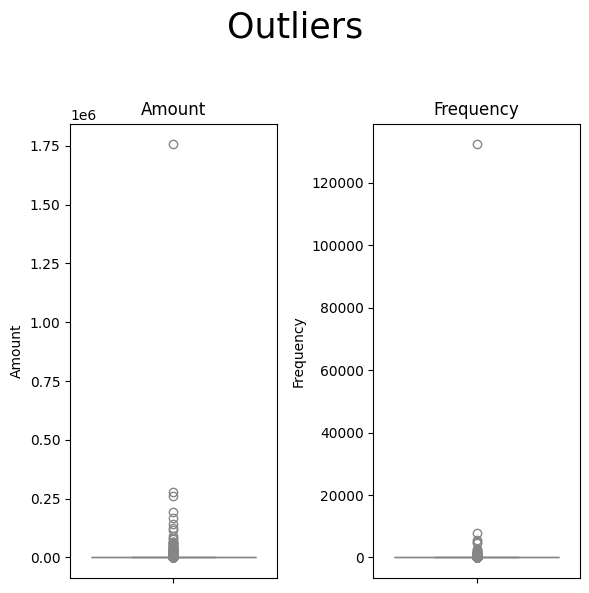

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [26]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]

# Agrupar transacciones por cliente y ordenarlas por fecha
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')

# Convertir la secuencia de transacciones en una lista de listas para GSP
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.1, 0.2]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.



Patrones secuenciales con un soporte de 0.1:
{(22423,): 882, (23084,): 451, (22666,): 472, (22720,): 641, (22960,): 574, (22138,): 582, (23245,): 473, (23298,): 574, (22384,): 445, (20725,): 533, (21212,): 636, (23355,): 475, (22961,): 538, (21790,): 450, (47566,): 709, ('85099B',): 636, (22139,): 489, (22382,): 491, (20728,): 480, (22383,): 435, (23209,): 470, (23203,): 506, ('85123A',): 857, (84879,): 679, (20727,): 458, (22910,): 471, (22086,): 614, (21034,): 481, (22457,): 588, (22469,): 574, (22470,): 486}


Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/gsppy/gsp.py", line 60, in _calc_frequency
    [t for t in self.transactions if self._is_slice_in_list(item, t)])
  File "/usr/local/lib/python3.10/dist-packages/gsppy/

KeyboardInterrupt: 

In [27]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

# Crear una nueva columna llamada 'Total' que representa el monto total de cada transacción
df["Total"] = df["Quantity"] * df["UnitPrice"]

# Eliminar las columnas 'Quantity' y 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Crear dos nuevas características: 'Amount' y 'Frequency'
# 'Amount': cantidad total gastada por cada cliente
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns = ['CustomerID', 'Amount']

# 'Frequency': número total de transacciones por cliente
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']

# Fusionar ambas características en un nuevo DataFrame
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')

# Eliminar la columna 'CustomerID'
df1.drop(['CustomerID'], axis=1, inplace=True)

# Realizar un análisis de detección de valores atípicos en el DataFrame resultante
outlier_detection_results = df1.describe(include='all')
print(outlier_detection_results)

# Convertir la secuencia de transacciones en una lista de listas para GSP
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.1, 0.2]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.


             Amount      Frequency
count  4.338000e+03    4338.000000
mean   2.458895e+03     122.200092
std    2.810288e+04    2019.397663
min    3.750000e+00       1.000000
25%    3.074150e+02      17.000000
50%    6.746000e+02      41.000000
75%    1.662170e+03     100.000000
max    1.755763e+06  132240.000000
Patrones secuenciales con un soporte de 0.1:
{(22423,): 882, (23084,): 451, (22666,): 472, (22720,): 641, (22960,): 574, (22138,): 582, (23245,): 473, (23298,): 574, (22384,): 445, (20725,): 533, (21212,): 636, (23355,): 475, (22961,): 538, (21790,): 450, (47566,): 709, ('85099B',): 636, (22139,): 489, (22382,): 491, (20728,): 480, (22383,): 435, (23209,): 470, (23203,): 506, ('85123A',): 857, (84879,): 679, (20727,): 458, (22910,): 471, (22086,): 614, (21034,): 481, (22457,): 588, (22469,): 574, (22470,): 486}
Patrones secuenciales con un soporte de 0.2:
{(22423,): 882}


In [30]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

# Crear una nueva columna llamada 'Total' que representa el monto total de cada transacción
df["Total"] = df["Quantity"] * df["UnitPrice"]

# Eliminar las columnas 'Quantity' y 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Crear dos nuevas características: 'Amount' y 'Frequency'
# 'Amount': cantidad total gastada por cada cliente
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns = ['CustomerID', 'Amount']

# 'Frequency': número total de transacciones por cliente
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']

# Fusionar ambas características en un nuevo DataFrame
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')

# Eliminar la columna 'CustomerID'
df1.drop(['CustomerID'], axis=1, inplace=True)

# Realizar un análisis de detección de valores atípicos en el DataFrame resultante
outlier_detection_results = df1.describe(include='all')
print(outlier_detection_results)

# Convertir la secuencia de transacciones en una lista de listas para GSP
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.5, 0.6]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.


Patrones secuenciales con un soporte de 0.5:
{('A',): 3, ('B',): 3, ('C',): 3, ('D',): 2}
{('A', 'B'): 2, ('B', 'C'): 2}
Patrones secuenciales con un soporte de 0.6:
{('A',): 3, ('B',): 3, ('C',): 3}


In [28]:
from gsppy.gsp import GSP

# Lista de secuencias de transacciones
transactions = [
    ['A', 'B', 'C'],
    ['A', 'B', 'D'],
    ['A', 'C'],
    ['B', 'C', 'D']
]

# Definir el nivel de soporte
support = 0.5

# Crear una instancia de GSP y ejecutar el algoritmo
gsp = GSP(transactions)
result = gsp.search(support)

# Imprimir los patrones secuenciales encontrados
print("Patrones secuenciales con un soporte de", support, ":")
for pattern in result:
    print(pattern)


Patrones secuenciales con un soporte de 0.5 :
{('A',): 3, ('C',): 3, ('B',): 3, ('D',): 2}
{('A', 'B'): 2, ('B', 'C'): 2}
